In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from models.img_autoencoder import ConvAutoencoder
import numpy as np
import matplotlib.pyplot as plt

from custom_dataset import MultiViewDataSet

data_transforms = {
        'train': transforms.Compose([
            #transforms.Grayscale(num_output_channels=1),
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
        ]),
        'test': transforms.Compose([
            #transforms.Grayscale(num_output_channels=1),
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
        ]),
    }

data_dir = 'E:\\Work\\MachineLearning\\datasets\\mvcnn\\shaded_images\\modelnet40_images_new_12x'
image_datasets = {x: MultiViewDataSet(root=data_dir, data_type=x, transform=data_transforms[x])
                    for x in ['train', 'test']}
dataloaders = {x: DataLoader(image_datasets[x], shuffle=True, batch_size=1, num_workers=4)
                for x in ['train', 'test']}

# defining the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# defining the model
convAE_model = ConvAutoencoder().to(device)
#convAE_model.load_state_dict(torch.load("E:\\Work\\MachineLearning\\results\\model_15.pth"))

<All keys matched successfully>

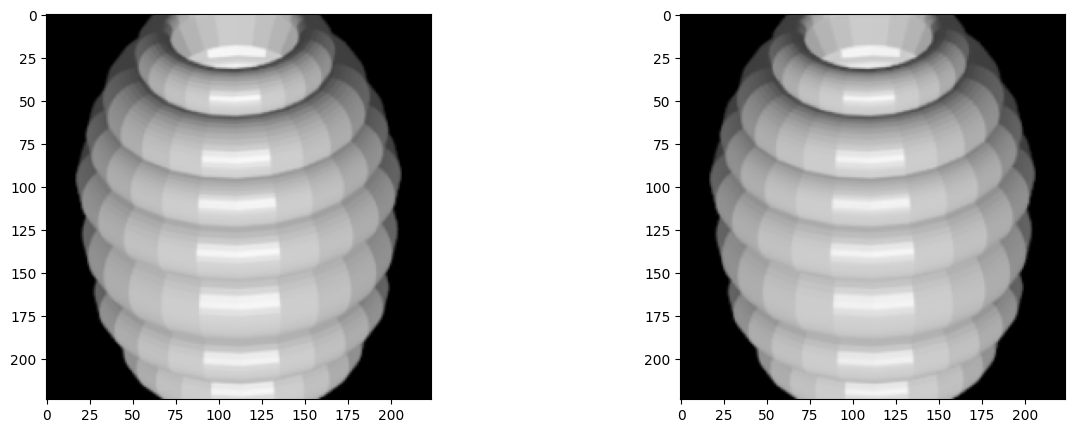

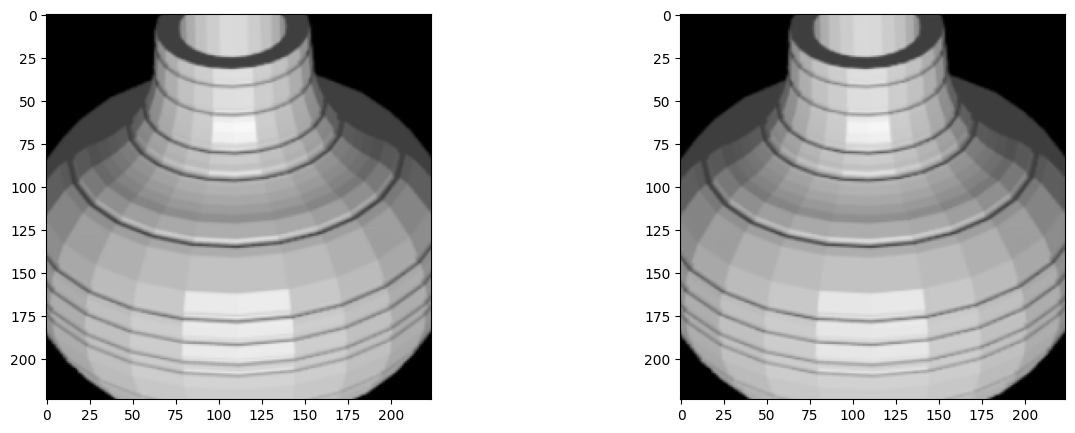

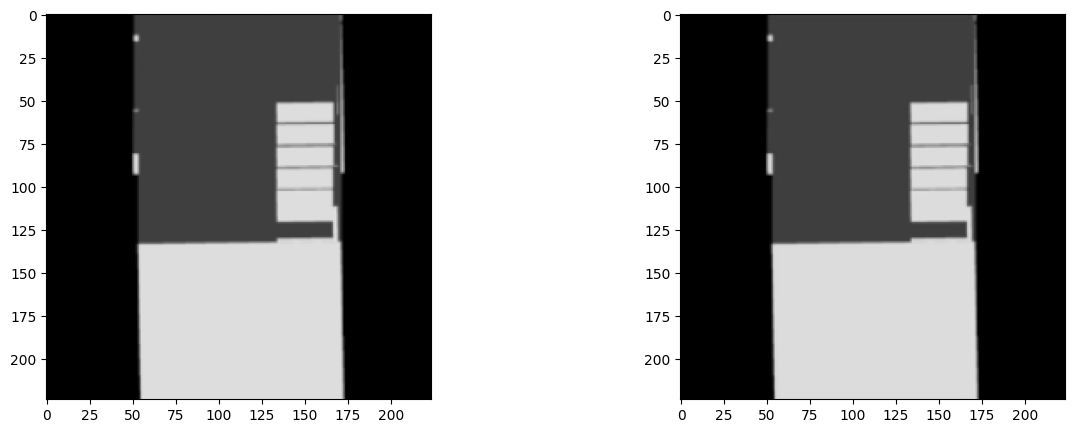

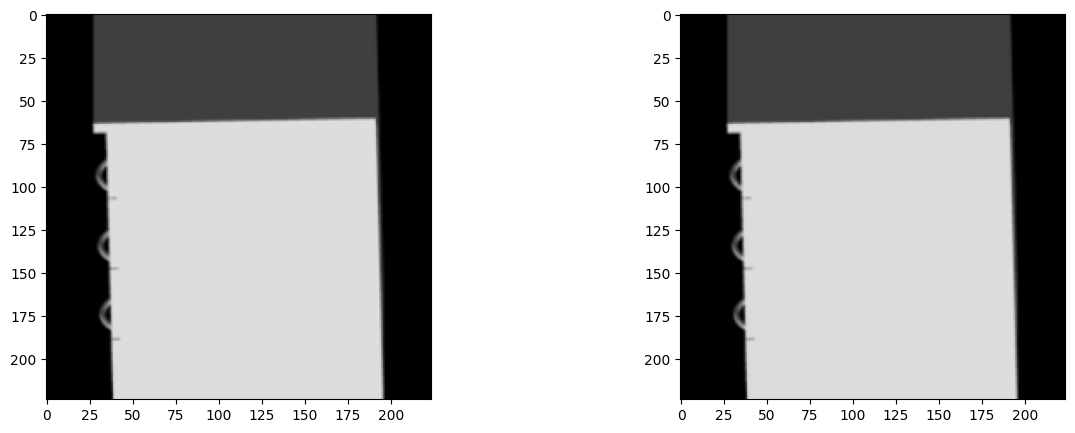

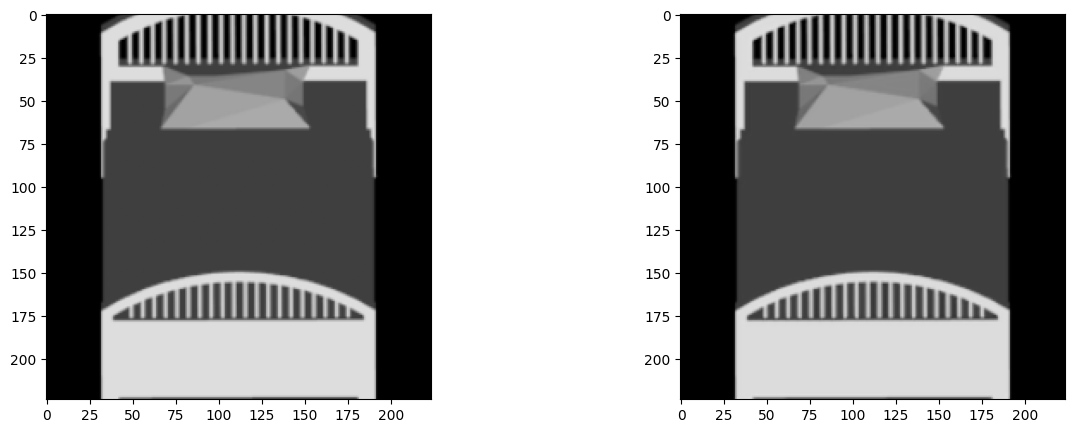

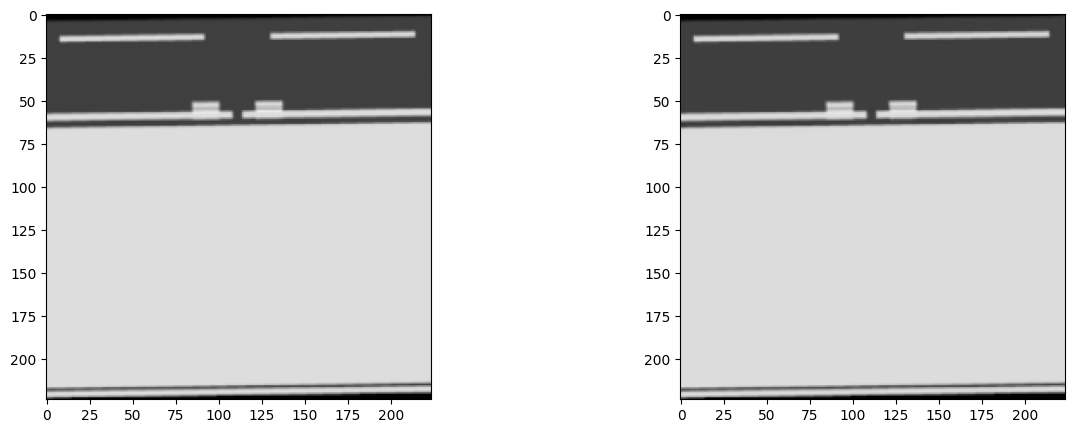

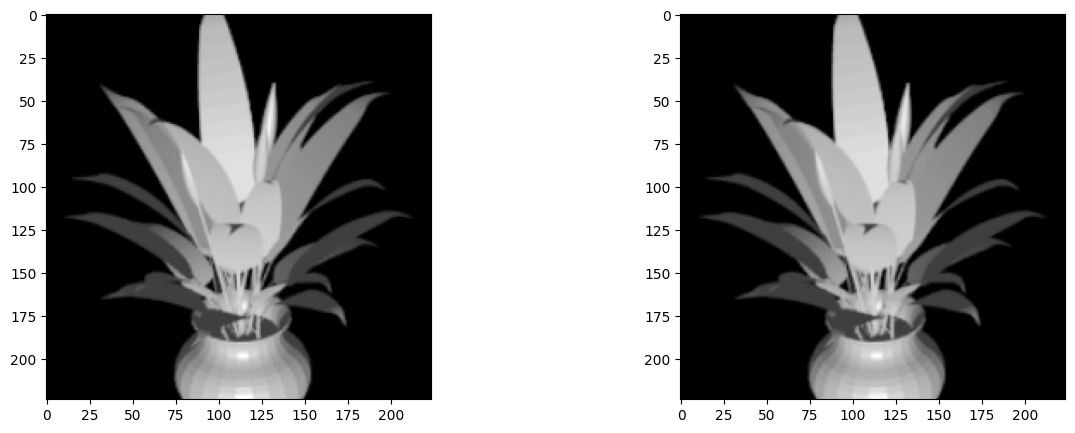

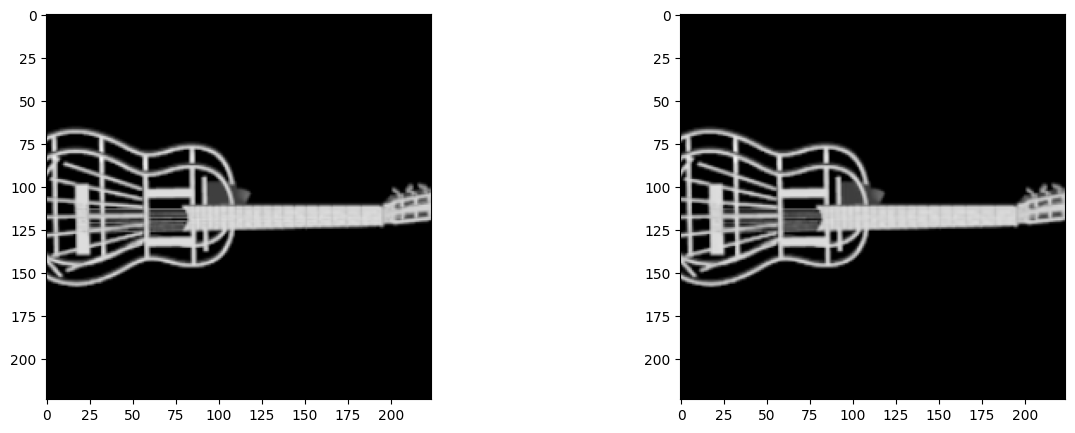

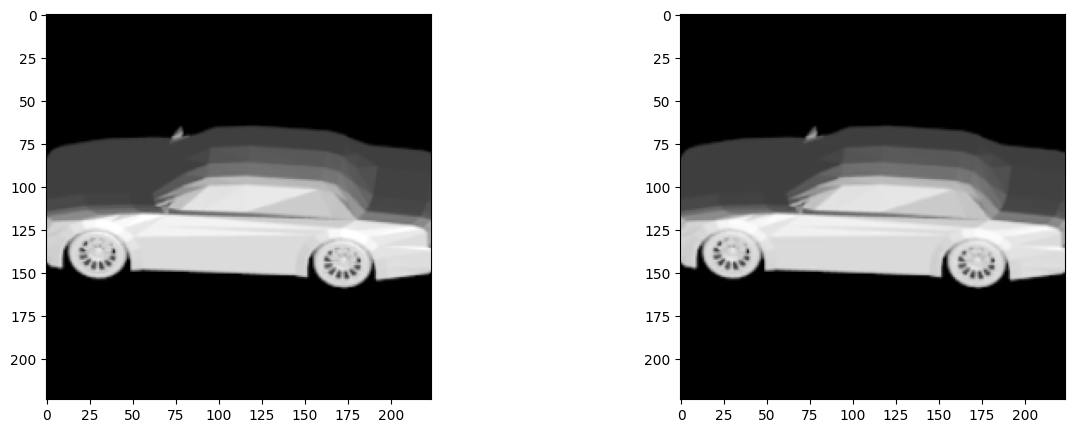

KeyboardInterrupt: 

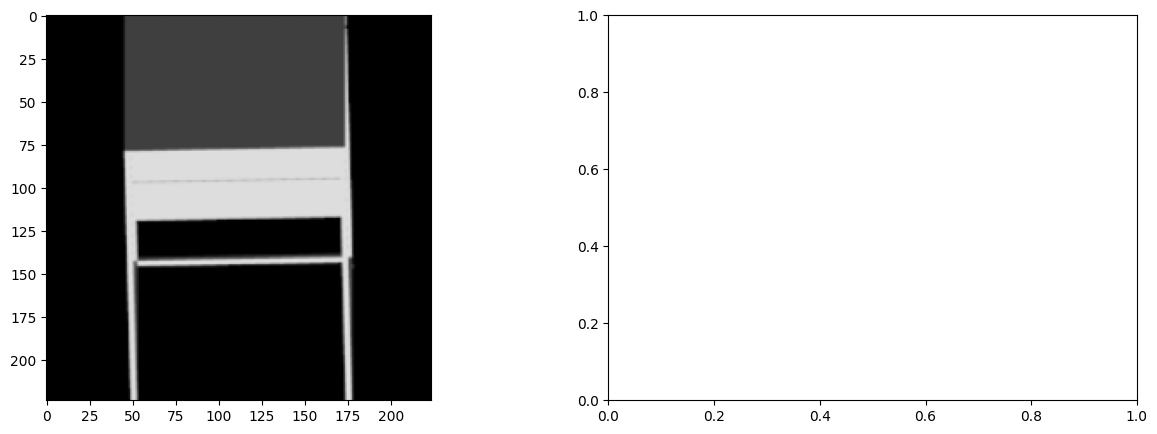

In [2]:
convAE_model.eval()

for X, y in dataloaders['test']:
        img = X[0].to(device)
    
        recon = convAE_model(img)

        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        axes[0].imshow(X[0][0].permute(1, 2, 0).numpy())
        axes[1].imshow(recon.cpu().detach()[0].permute(1, 2, 0).numpy())

        plt.pause(0.001)
        plt.show()